# Data preperation

## Data import

Import libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Import temperature data

In [2]:
mean_temp_1 = pd.read_csv("./data/tas_1961_1990_MNG.csv")
mean_temp_2 = pd.read_csv("./data/tas_1991_2020_MNG.csv")

In [3]:
mean_rainfall_1 = pd.read_csv("./data/pr_1961_1990_MNG.csv")
mean_rainfall_2 = pd.read_csv("./data/pr_1991_2020_MNG.csv")

In [4]:
mean_temp_1.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-20.8,1961,Jan Average,Mongolia,MNG
1,-15.7,1961,Feb Average,Mongolia,MNG
2,-8.3,1961,Mar Average,Mongolia,MNG
3,4.5,1961,Apr Average,Mongolia,MNG
4,8.7,1961,May Average,Mongolia,MNG


In [5]:
mean_rainfall_1.head()

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,2.7,1961,Jan Average,Mongolia,MNG
1,0.7,1961,Feb Average,Mongolia,MNG
2,4.6,1961,Mar Average,Mongolia,MNG
3,9.2,1961,Apr Average,Mongolia,MNG
4,24.1,1961,May Average,Mongolia,MNG


Import animal data

In [6]:
animal = pd.read_csv("./data/DT_NSO_1001_021V1_-_2021-06-08_-_www.1212.mn.csv", thousands=',')

In [7]:
animal.head()

,"Баг, хороо",Малын төрөл,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Баруун бүс,Бүгд,7246.47,7570.68,7600.46,7856.79,7760.02,7630.71,7510.50,7169.72,...,8525.36,9670.83,10832.75,12544.51,13711.18,15135.83,16201.58,15557.38,16004.30,15845.18
1,Баруун бүс,Адуу,510.88,535.83,540.69,542.67,552.87,522.15,510.44,477.56,...,332.69,369.46,414.57,478.38,534.40,607.17,676.12,700.21,734.54,729.50
2,Баруун бүс,Үхэр,497.31,544.17,549.05,563.38,579.95,557.22,546.18,529.12,...,369.36,423.84,497.47,599.28,675.36,742.22,815.96,822.74,854.56,858.96
3,Баруун бүс,Тэмээ,169.11,173.19,171.47,172.96,171.55,169.52,168.17,166.48,...,67.64,74.27,77.79,84.13,88.55,96.21,103.91,107.57,109.83,108.63
4,Баруун бүс,Хонь,4392.71,4582.04,4614.59,4765.16,4671.71,4619.97,4528.01,4325.99,...,3414.71,4034.52,4549.41,5318.11,5758.53,6417.55,6903.22,6606.93,6729.71,6431.83


## Data cleanning

Translate column names into english

In [8]:
animal = animal.rename(columns={'Баг, хороо': 'Region', 'Малын төрөл': 'Kind'})

Flatten the matrix of animal data

In [9]:
animal = animal.melt(id_vars=animal[["Region", "Kind"]], value_vars=list(animal.columns[2:]),var_name='Year', value_name='Number of head')

Filter Total rows

In [10]:
animal = animal[animal["Kind"] != "Бүгд"]

In [11]:
animal.head()

,Region,Kind,Year,Number of head
1,Баруун бүс,Адуу,1970,510.88
2,Баруун бүс,Үхэр,1970,497.31
3,Баруун бүс,Тэмээ,1970,169.11
4,Баруун бүс,Хонь,1970,4392.71
5,Баруун бүс,Ямаа,1970,1676.46


Translate string values into english

In [12]:
#Kind of animals
animal = animal.replace({'Kind': {"Адуу": "Horse", "Үхэр": "Cow", "Тэмээ": "Camel", "Хонь": "Sheep", "Ямаа": "Goat"}})
#Regions
animal = animal.replace({'Region': {"Баруун бүс": "West", "Зүүн бүс": "East", "Төвийн бүс": "Center", "Улаанбаатар": "UB", "Хангайн бүс": "Khangai"}})

Union temperature data of "1961 - 1990" and "1991 - 2020"

In [13]:
frames_temp = [mean_temp_1, mean_temp_2]
mean_temp = pd.concat(frames_temp)
mean_temp.tail()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
355,16.2,2020,Aug Average,Mongolia,MNG
356,10.9,2020,Sep Average,Mongolia,MNG
357,0.4,2020,Oct Average,Mongolia,MNG
358,-8.0,2020,Nov Average,Mongolia,MNG
359,-20.8,2020,Dec Average,Mongolia,MNG


Union rainfall data of "1961 - 1990" and "1991 - 2020"

In [14]:
frames_rainfall = [mean_rainfall_1, mean_rainfall_2]
mean_rainfall = pd.concat(frames_rainfall)
mean_rainfall.tail()

,Rainfall - (MM),Year,Statistics,Country,ISO3
355,70.0,2020,Aug Average,Mongolia,MNG
356,21.9,2020,Sep Average,Mongolia,MNG
357,8.3,2020,Oct Average,Mongolia,MNG
358,5.3,2020,Nov Average,Mongolia,MNG
359,1.4,2020,Dec Average,Mongolia,MNG


Drop unnecessary columns

In [15]:
mean_temp.drop(mean_temp.columns[[3, 4]], axis=1, inplace=True)
mean_rainfall.drop(mean_rainfall.columns[[3, 4]], axis=1, inplace=True)

Join temperature and rainfall data to create one dataset for weather data

In [16]:
#Temperature and rainfall
weather = pd.merge(mean_temp, mean_rainfall, how="left", left_on=[' Year',' Statistics'], right_on = [' Year',' Statistics'])

Join weather and animal data to create a single dataset aggregated by Year

In [17]:
weather_prep = weather.groupby([' Year'])['Temperature - (Celsius)', 'Rainfall - (MM)'].mean().reset_index()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [18]:
#Change the type of the column Year of Animal dataframe and correct the unit of the field Number of head
animal.Year = pd.to_numeric(animal.Year)
animal["Number of head"] = pd.to_numeric(animal["Number of head"]) * 1000

In [19]:
animal_prep = animal.groupby(['Year'])['Number of head'].sum().reset_index()

In [20]:
#Join weather and animal
dataset = pd.merge(weather_prep, animal_prep, how="left", left_on=[' Year'], right_on = ['Year'])

For further analysis, we are going to create a dataset which join weather and goat data

In [21]:
animal_prep_goat = animal[animal.Kind == "Goat"]
animal_prep_goat = animal_prep_goat.groupby(['Year'])['Number of head'].sum().reset_index()
dataset_goat = pd.merge(weather_prep, animal_prep_goat, how="left", left_on=[' Year'], right_on = ['Year'])

# Data exploration

1. To see if the rise of temperature is real

We group Months by Season to see the average temperature and rainfall of each season per year

In [22]:
weather = weather.replace({' Statistics': {" Jan Average": "winter", " Feb Average": "winter", " Mar Average": "spring", " Apr Average": "spring", " May Average": "spring", " Jun Average" : "summer", " Jul Average" : "summer", " Aug Average" : "summer", " Sep Average" : "fall", " Oct Average" : "fall", " Nov Average" : "fall", " Dec Average" : "winter"}})

In [26]:
weather = weather.groupby([' Year', ' Statistics'])['Temperature - (Celsius)', 'Rainfall - (MM)'].mean().reset_index()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


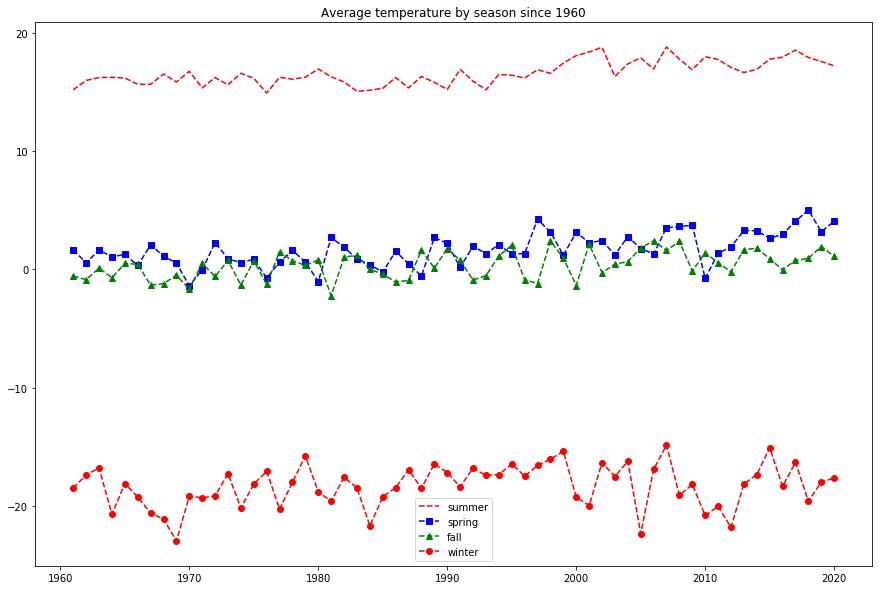

In [30]:
plt.figure(figsize=(15,10))
plt.title("Average temperature by season since 1960", fontdict=None, loc='center', pad=None)

plt.plot(" Year", "Temperature - (Celsius)", 'r--', data=weather[weather[" Statistics"] == "summer"], label = "summer")
plt.plot(" Year", "Temperature - (Celsius)", 'bs--', data=weather[weather[" Statistics"] == "spring"], label = "spring")
plt.plot(" Year", "Temperature - (Celsius)", 'g^--', data=weather[weather[" Statistics"] == "fall"], label = "fall")
plt.plot(" Year", "Temperature - (Celsius)", 'ro--', data=weather[weather[" Statistics"] == "winter"], label = "winter")

# show legend
plt.legend()

# show graph
plt.show()

We can see that average temperature of summer, spring and fall rises slightly

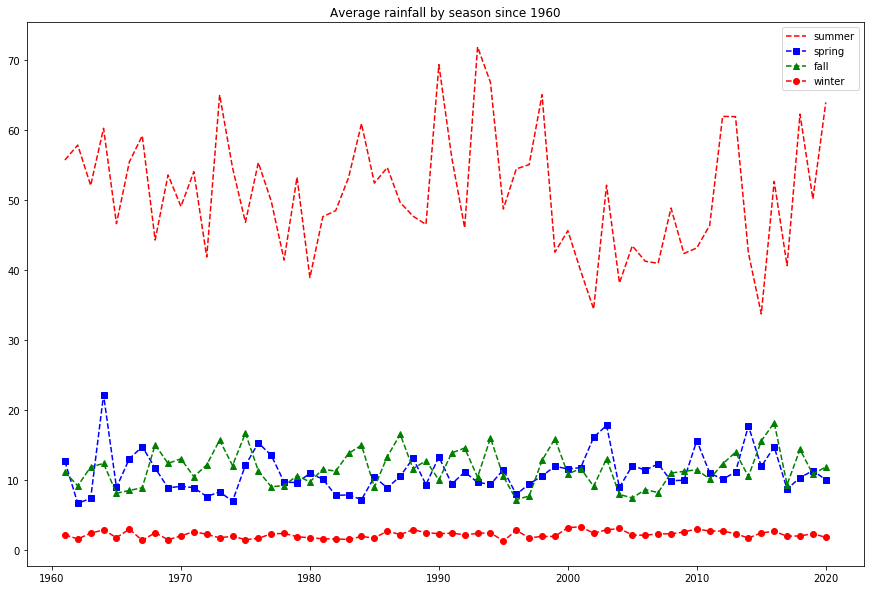

In [43]:
plt.figure(figsize=(15,10))
plt.title("Average rainfall by season since 1960", fontdict=None, loc='center', pad=None)

plt.plot(" Year", "Rainfall - (MM)", 'r--', data=weather[weather[" Statistics"] == "summer"], label = "summer")
plt.plot(" Year", "Rainfall - (MM)", 'bs--', data=weather[weather[" Statistics"] == "spring"], label = "spring")
plt.plot(" Year", "Rainfall - (MM)", 'g^--', data=weather[weather[" Statistics"] == "fall"], label = "fall")
plt.plot(" Year", "Rainfall - (MM)", 'ro--', data=weather[weather[" Statistics"] == "winter"], label = "winter")

# show legend
plt.legend()

# show graph
plt.show()

Difficult to say if average rainfall decreases on the graph above

Let's see by statistical method if there is a correlation between these two features

In [46]:
coeff_pearson, = pearsonr(weather["Temperature - (Celsius)"],weather["Rainfall - (MM)"])
print("coefficient de Pearson = {}".format(coeff_pearson)

SyntaxError: unexpected EOF while parsing (<ipython-input-46-d0cda73771fb>, line 2)

2. To see if the rise of temperature is correlated to the rise of number of animals

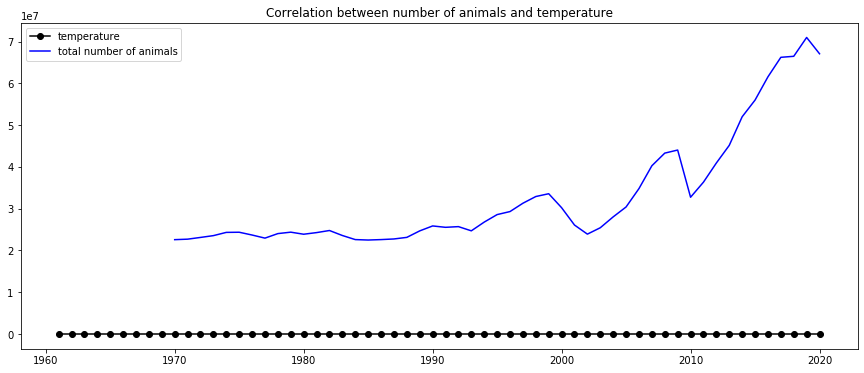

In [41]:
plt.figure(figsize=(15,6))
plt.title("Correlation between number of animals and temperature", fontdict=None, loc='center', pad=None)

plt.plot(" Year", "Temperature - (Celsius)", '-ok', color = "black", data=dataset, label = "temperature")
plt.plot(" Year", "Number of head", 'b', data=dataset, label = "total number of animals")
# show legend
plt.legend()
# show graph
plt.show()

In [25]:
#animal.groupby(['Year','Kind'])['Number of head'].sum().reset_index().plot(x="Year", y="Kind", kind="bar")

TypeError: no numeric data to plot

In [ ]:
animal.groupby(['Year','Kind'])['Number of head'].sum().reset_index()